**LOGISTIC REGRESSION**

Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given data set of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. It is mainly used for binary classification( churn or not churn, good or bad, etc.) but it is also used for multi-classification(low, normal, high).

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing,  (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("/content/sample_data/heart.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
data.shape

(1025, 14)

this data set has 569 rows. 32 columns

Exercise: interact with your data set

In [ ]:
data.tail(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1005,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
1006,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
1007,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
1008,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
1009,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
1010,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1012,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
1013,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Preparing the model
y = data["age"] # our target variable
X = data.drop(["age"], axis=1) # our predictors

The data is not yet normalized. This can be a problem because the units of our variables are not necessarily in the same units. Also, there might be some outliers that could cause our model to perform poorly.

In these cases, we normalize the data before feeding it into our model. This will improve the performance of our machine-learning algorithm.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)  #formula

# X_scaled is now a numpy array with normalized data

In [ ]:
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

# importing the class
from sklearn.linear_model import LogisticRegression

# representing the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fitting the model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(X_test)

**CONFUSION MATRIX**  -. A confusion matrix is a visualization tool most commonly used to evaluate the performance of a classification model in machine learning by visually displaying how well a model is able to correctly classify data points across different classes, highlighting where the model makes mistakes and which classes it struggles with most; it allows for the calculation of metrics like precision and recall to gain deeper insights into model performance beyond just overall accuracy.

In [ ]:
# importing the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 2]])

Text(0.5, 23.52222222222222, 'Predicted label')

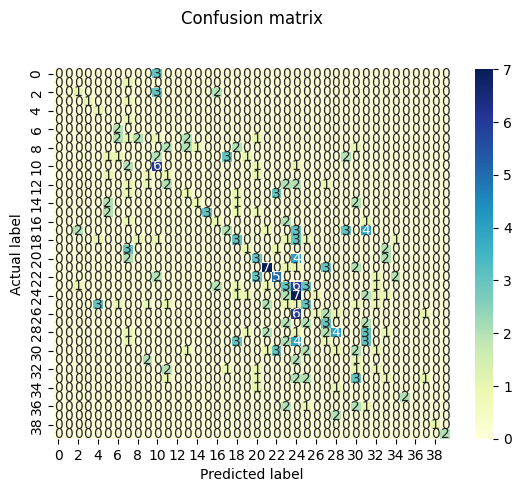

In [ ]:
# importing required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# creating heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("bottom")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Exercise:

Q) Interpret this confusion matrix



*   **True Negatives (106):** this model correctly predicted 106 cases (negative, class 0 )

*  **False Positives** (2) : this model incorrectly predicted 2 cases when the actual value was 0 (false alarm)

*   
*







**EVALUATION METRICS** -

**Recall (Sensitivity)**: Formula: True Positives / (True Positives + False Negatives) Interpretation: How well the model captures all the positive cases.

**Precision**: Formula: True Positives / (True Positives + False Positives) Interpretation: How accurate the model is when predicting positive cases.

**F1 Score**: Formula: 2 * (Precision * Recall) / (Precision + Recall) Interpretation: A harmonic mean of precision and recall, giving a single value to evaluate model performance when both identifying positive cases and minimizing false positives are important. F1-score combines precision and recall into a single number to give you an overall measure of a model’s performance.

**Support** refers to the number of actual occurrences of the class in the dataset. It is the number of instances in each class.

Benign → non-cancerous (class 0)

Malignant → cancerous (class 1)

In [ ]:
from sklearn.metrics import classification_report
#target_names = ["benign", "malignant"]
labels = np.unique(y_test)
target_names = [f"Class {label}" for label in labels]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Class 29       0.00      0.00      0.00         3
    Class 34       0.00      0.00      0.00         1
    Class 35       0.25      0.17      0.20         6
    Class 37       1.00      0.50      0.67         2
    Class 38       0.20      1.00      0.33         1
    Class 39       0.00      0.00      0.00         1
    Class 40       0.33      1.00      0.50         2
    Class 41       0.06      0.11      0.08         9
    Class 42       0.00      0.00      0.00         8
    Class 43       0.00      0.00      0.00        10
    Class 44       0.33      0.60      0.43        10
    Class 45       0.11      0.25      0.15         4
    Class 46       0.00      0.00      0.00         9
    Class 47       0.17      0.17      0.17         6
    Class 48       0.50      0.17      0.25         6
    Class 49       1.00      0.43      0.60         7
    Class 50       0.20      0.20      0.20         5
    Class 51       0.33    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


interpretation: (benign)

Precision: 99% , high precision means the rarely misclassifies 0 as 1

recall: 98%, this model has a high recall % meaning the model detects most positive cases.

F1 score:   A high F1 score of  model indicates a well balanced model.

Accuracy: the model performs exceptionally well with 98% accuracy

Conclusion : This is a strong and reliable model


malignant"

**ROC CURVE** - In scikit-learn, the roc_curve function is used to compute Receiver Operating Characteristic (ROC) curve points. On the other hand, the auc function calculates the Area Under the Curve (AUC) from the ROC curve. It is used in supervised learning because it provides a visual representation of a classification model's performance across all possible classification thresholds, allowing for a comprehensive evaluation of how well a model distinguishes between classes, especially when dealing with imbalanced datasets, and enabling the comparison of different models based on their trade-offs between true positive rates (TPR) and false positive rates (FPR). In ROC curve, "pos_label=1" means that when interpreting the curve, the class labeled as "1" is considered the positive class, which is the class you are primarily interested in identifying correctly; therefore, the true positive rate (TPR) on the y-axis will be calculated based on the predictions for class 1, while the false positive rate (FPR) on the x-axis will be calculated based on the predictions for the other class (usually labeled as 0).

interpret:

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Predict probabilities for positive class
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
print("Unique classes in y_test:", np.unique(y_test))

Unique classes in y_test: [29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 74 76 77]


**Feature Engineering**

**Handling Missing Data (Imputation): Mean/Median/Mode Imputation:** Replacing missing values with the mean, median, or mode of the feature depending on the data distribution (most suitable for handling missingness assumed to be completely random).

Why Imputation is Necessary
Missing data can skew your analysis, reduce model accuracy, and lead to biased results. Imputation fills these gaps, allowing you to use the complete dataset for analysis and modeling.

Key Reasons for Imputation:

Preserve Data Integrity: Missing values can lead to biased estimates and incorrect conclusions.

Improve Model Performance: Most machine learning algorithms require a complete dataset.

Handle Non-ignorable Missingness: Sometimes the fact that data is missing is informative in itself.


**KNN Imputation:** Using the values of nearby data points (based on similarity) to fill in missing values.

**Constant Value Imputation:** Assigning a specific value like "unknown" to indicate missing data.

**Indicator Variables:** Creating new binary features to signify whether a value is missing or not.

**Feature Scaling:**
Standardization: Transforming features to have a mean of 0 and standard deviation of 1, useful when features have different scales and outliers may be present.

**Normalization:** Scaling features to a range between 0 and 1, preferred when the feature distribution is not normal and you want to emphasize relative values.

**Encoding Categorical Variables:**
One-Hot Encoding: Creating new binary features for each unique category, effectively converting categorical data into numerical representation.
Label Encoding: Assigning unique integer values to each category, suitable when the order of categories is meaningful.

**Target Encoding:** Encoding categories based on the target variable, capturing relationships between categorical features and the prediction

**Feature Transformation:**
Log Transformation: Applying logarithm to features with skewed distributions to normalize them.

**Power Transformation:** Raising features to a power to adjust their distribution

**Binning:** Discretizing continuous features by grouping them into bins, useful for creating non-linear relationships


Feature Interaction: Creating new features by multiplying or combining existing features to capture potential interactions